In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        break
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , auc , accuracy_score

import tensorflow as tf
from tensorflow import keras

from PIL import Image
import cv2
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,Conv2D, Flatten,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

import warnings
warnings.filterwarnings('ignore')

In [3]:
path = "/kaggle/input/plant-disease-recognition-dataset/Train/Train"
train = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 1322 files belonging to 3 classes.


In [4]:
path = "/kaggle/input/plant-disease-recognition-dataset/Test/Test"
test = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 150 files belonging to 3 classes.


In [5]:
path = "/kaggle/input/plant-disease-recognition-dataset/Validation/Validation"
valid = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 60 files belonging to 3 classes.


In [6]:
class_labels = train.class_names
class_labels

['Healthy', 'Powdery', 'Rust']

In [7]:
print(len(train))
print(len(test))
print(len(valid))

42
5
2


## Data Preprocessing

In [8]:
for image_batch,image_label in train.take(1):
    print(image_batch[0])
    print(class_labels[image_label[0].numpy()])

tf.Tensor(
[[[ 68.33789  114.33789   50.33789 ]
  [ 64.83008  109.83008   44.83008 ]
  [ 66.       112.        48.      ]
  ...
  [236.28125  242.28125  204.28125 ]
  [223.28125  235.28125  195.28125 ]
  [211.20703  230.19531  181.70117 ]]

 [[ 65.26367  115.16992   50.058594]
  [ 63.921875 109.078125  44.078125]
  [ 67.8125   113.8125    49.65625 ]
  ...
  [228.73828  240.05078  196.89453 ]
  [208.30273  227.30273  182.14648 ]
  [200.15625  223.58008  173.53125 ]]

 [[ 69.76758  115.76758   53.76758 ]
  [ 65.8125   111.8125    46.8125  ]
  [ 66.4375   112.4375    47.4375  ]
  ...
  [217.21875  238.40625  176.75    ]
  [209.19336  230.78711  170.00586 ]
  [195.86914  220.96484  161.36914 ]]

 ...

 [[ 64.7207   106.7207    33.345703]
  [ 65.28906  113.28906   39.289062]
  [ 74.50195  120.50195   47.501953]
  ...
  [123.40625  168.40625  103.40625 ]
  [127.       171.       109.1875  ]
  [131.6875   172.6875   113.875   ]]

 [[ 66.93555  108.93555   36.720703]
  [ 79.53711  121.69336   

## Train Image Data

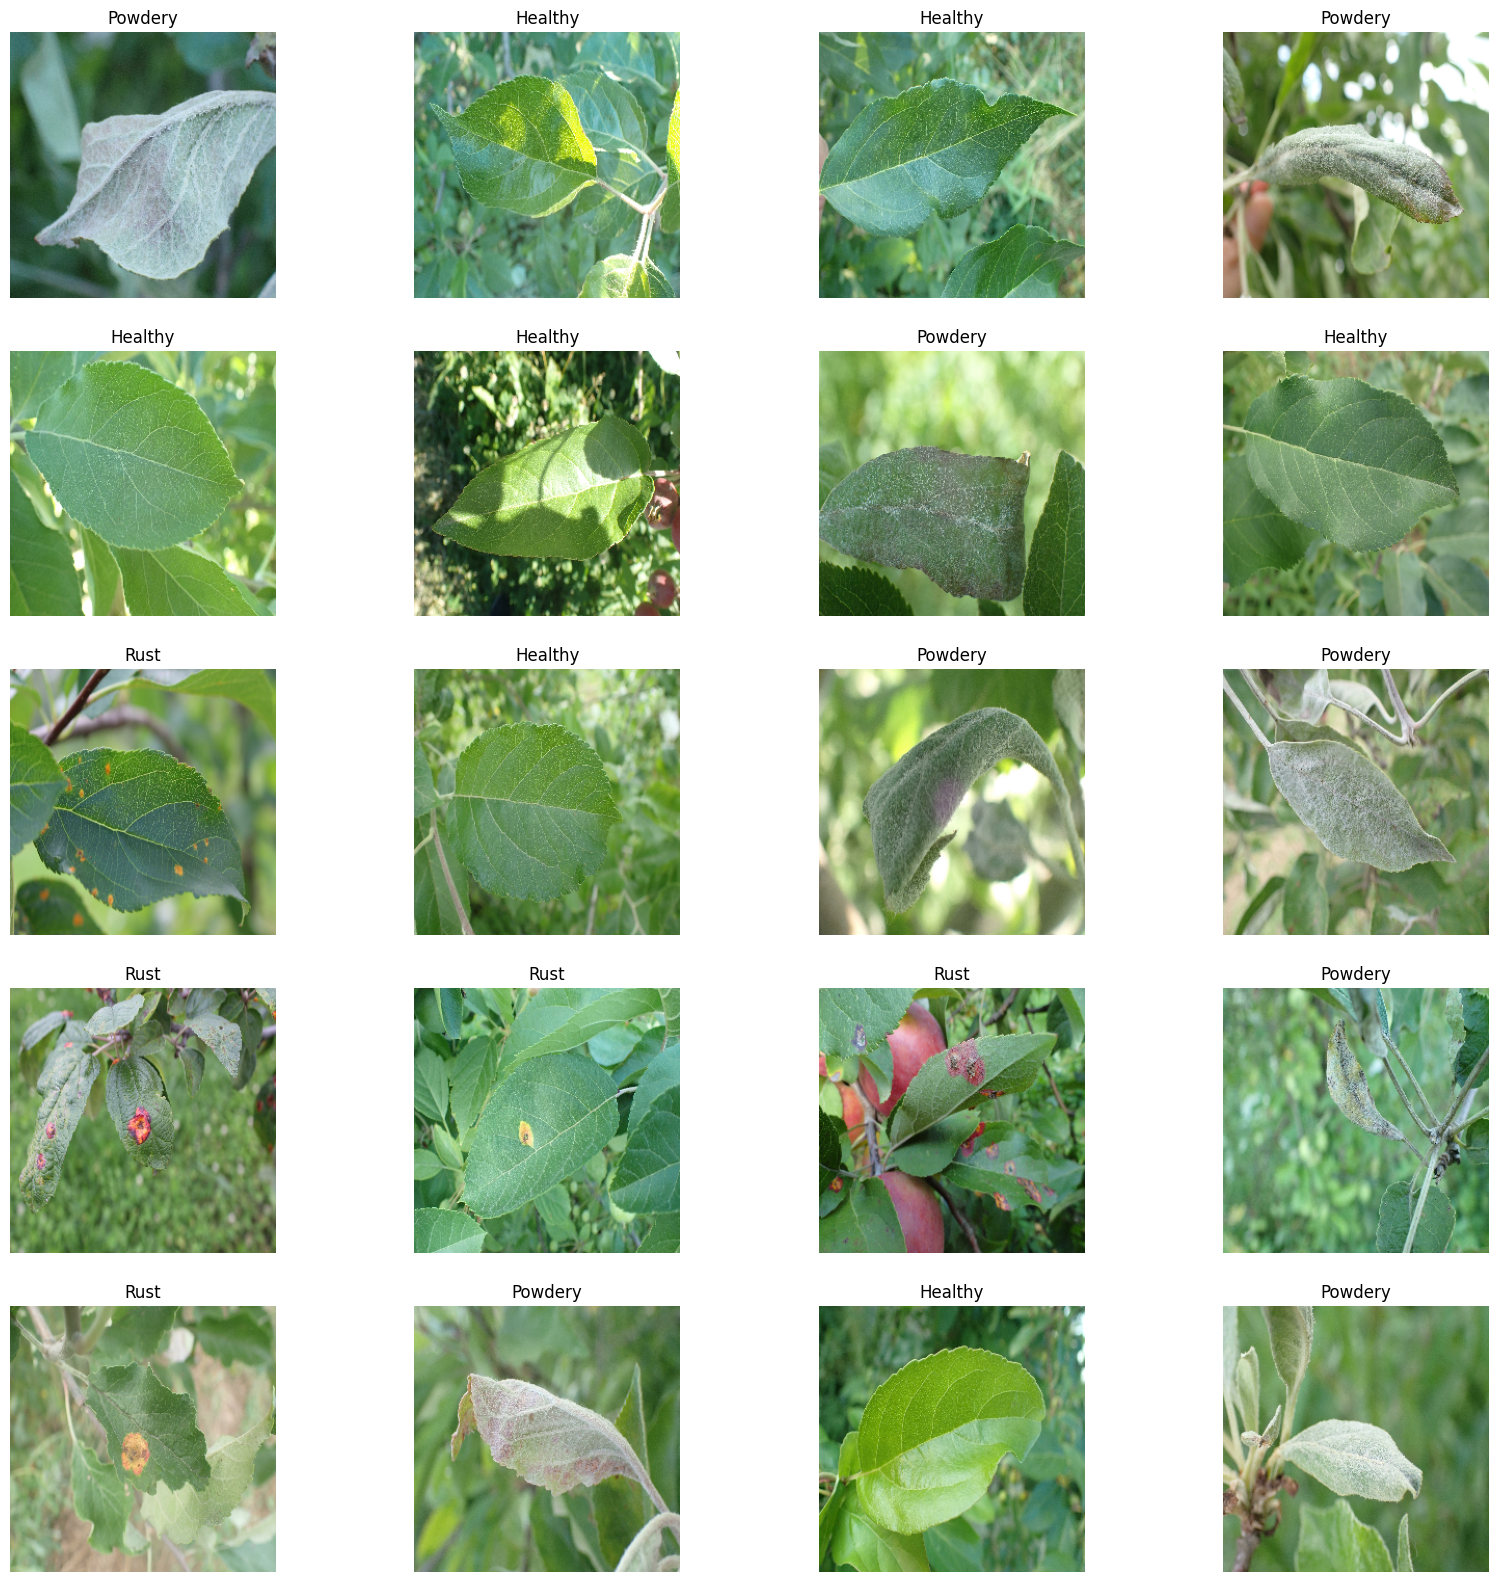

In [9]:
plt.figure(figsize=(20,20))
for image_batch , image_label in train.take(1):
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_labels[image_label[i].numpy()])
        plt.axis("off")

## Resizing and Rescaling Images

In [10]:
resizing_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(256,256),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

## Data Augmentation

In [11]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.3),
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.3),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

## Creat CNN Model 

In [12]:
IMAGE_SIZE=256
CHANNELS=3
BATCH_SIZE=32
EPOCHS=10

input_shape=(BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

new_model3= tf.keras.models.Sequential([
  resizing_and_rescaling,
  data_augmentation,
  # Convolution layer 1
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu',input_shape=input_shape),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
  # Convolution layer 2
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
  # Convolution layer 3  
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
  # Convolution layer 4  
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Flatten Layers
  tf.keras.layers.Flatten(),

  # Dense layers
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units=100,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=3,activation='softmax')

])

new_model3.build(input_shape=input_shape)

In [13]:
new_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [14]:
new_model3.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

history = new_model3.fit(train ,  batch_size=32 ,epochs=10,
                verbose=2,
                validation_data=valid) # epochs=10

Epoch 1/10
42/42 - 193s - loss: 1.0881 - accuracy: 0.3555 - val_loss: 1.2245 - val_accuracy: 0.3333 - 193s/epoch - 5s/step
Epoch 2/10
42/42 - 188s - loss: 0.9882 - accuracy: 0.4947 - val_loss: 0.8679 - val_accuracy: 0.5500 - 188s/epoch - 4s/step
Epoch 3/10
42/42 - 196s - loss: 0.7415 - accuracy: 0.6278 - val_loss: 0.7200 - val_accuracy: 0.5667 - 196s/epoch - 5s/step
Epoch 4/10
42/42 - 200s - loss: 0.7058 - accuracy: 0.7012 - val_loss: 0.6272 - val_accuracy: 0.6500 - 200s/epoch - 5s/step
Epoch 5/10
42/42 - 205s - loss: 0.5448 - accuracy: 0.7821 - val_loss: 0.9911 - val_accuracy: 0.7500 - 205s/epoch - 5s/step
Epoch 6/10
42/42 - 189s - loss: 0.3940 - accuracy: 0.8896 - val_loss: 0.3656 - val_accuracy: 0.8667 - 189s/epoch - 5s/step
Epoch 7/10
42/42 - 190s - loss: 0.3293 - accuracy: 0.8926 - val_loss: 0.2323 - val_accuracy: 0.9167 - 190s/epoch - 5s/step
Epoch 8/10
42/42 - 188s - loss: 0.2684 - accuracy: 0.9123 - val_loss: 0.2034 - val_accuracy: 0.9500 - 188s/epoch - 4s/step
Epoch 9/10
42/42

## Accuracy and loss on Train and Test

In [15]:
loss,acc = new_model3.evaluate(train)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

loss1,acc1 = new_model3.evaluate(test)

print("Loss on Test data:",loss1)
print("Accuracy on Test data:",acc1)

42/42 [==============================] - 71s 2s/step - loss: 0.1401 - accuracy: 0.9546
Loss on Train data: 0.14008471369743347
Accuracy on Train data: 0.9546142220497131
5/5 [==============================] - 9s 936ms/step - loss: 0.2525 - accuracy: 0.9267
Loss on Test data: 0.25245392322540283
Accuracy on Test data: 0.9266666769981384


In [16]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

## Image Predictions on Test Data

In [17]:
def Prediction(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array((images[i].numpy()))
    img_array = tf.expand_dims(img_array,0)     # create a batch

    predictions = model.predict(img_array)

    predicted_class = class_labels[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    
    return predicted_class , confidence

1/1 [==============================] - 0s 52ms/step


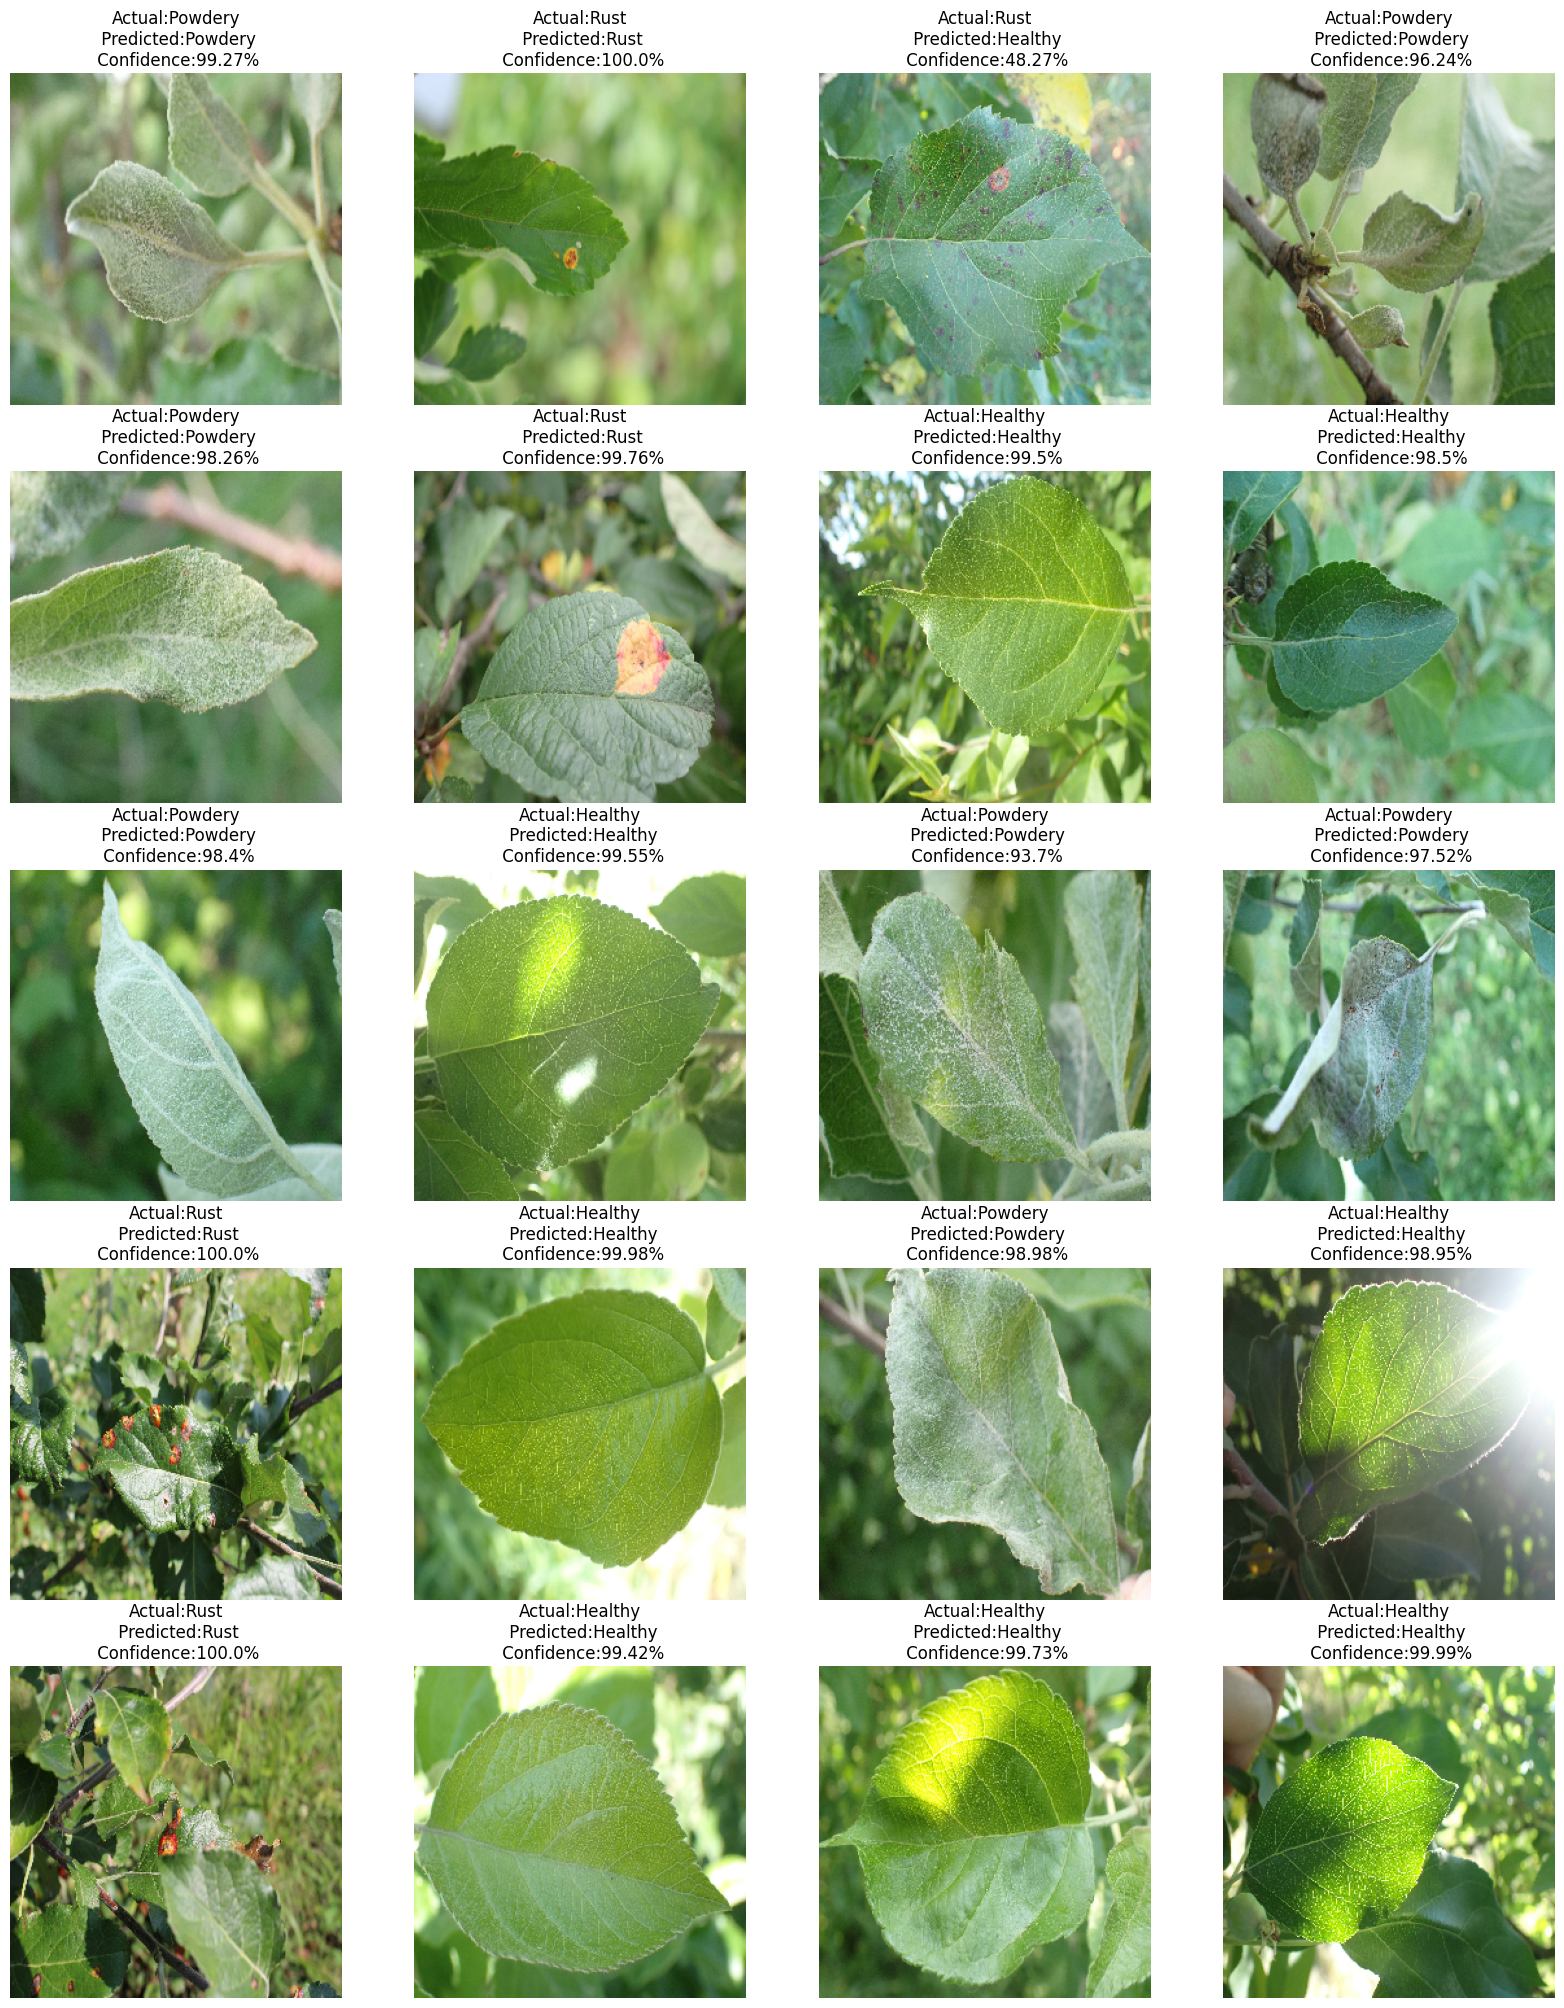

In [18]:
plt.figure(figsize=(20,25))
for images , labels in test.take(1):
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_labels[labels[i]])


        predicted_class , confidence = Prediction(new_model3,images[i].numpy())
        actual_class = class_labels[labels[i]]
        plt.title(f"Actual:{actual_class}\n Predicted:{predicted_class}\n Confidence:{confidence}%")
        plt.axis("off")

In [19]:
from tensorflow.keras.models import load_model

# Assuming 'model' is your trained Keras model
new_model3.save('model.h5')